In [35]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import plot_confusion_matrix as pcm
from sklearn import tree




In [36]:
# Some arbitrary data transformation for easier handling

train = pd.read_csv('data/train.csv') # train data
train = train[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
train = pd.get_dummies(train)
train = train.fillna(train.median())
test = pd.read_csv('data/test.csv') # test data
test = test[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
test = pd.get_dummies(test)
test = test.fillna(test.median())
res = pd.read_csv('data/gender_submission.csv') # ground truth
res = res['Survived']

# Split train to features and targets

Y_train = np.array(train.iloc[:, [0]])
X_train = train.drop(train.iloc[:, [0]].columns, axis=1)

0.9976076555023924


d:\Programing\Gitted\Datamining_course\python_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


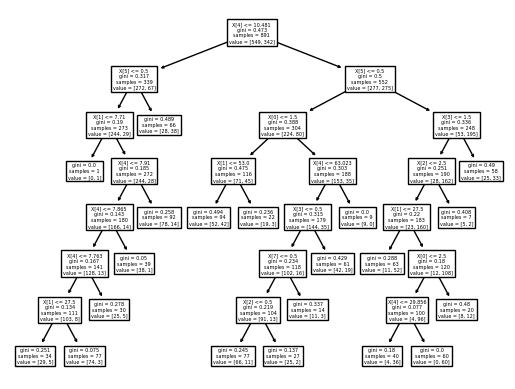

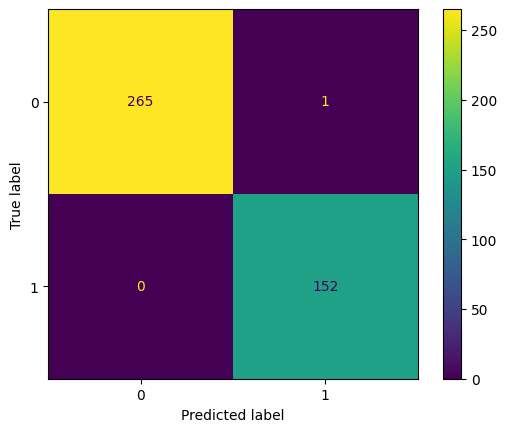

In [37]:
clf = DTC(random_state=42,criterion = "gini",min_samples_split = 100,max_features = "sqrt")#"entropy"  #log_loss
clf.fit(X_train,Y_train.ravel())
Y_test = clf.predict(test)
Y_test_proba = clf.predict_proba(test)[:,1]


tree.plot_tree(clf)


print(acc(res,Y_test))
pcm(clf,test,res)